# Tarea 4. Optimización
Guillermo Segura Gómez

## Ejercicio 1

Para cada función $f(x)$ calcule de manera analítica la Hessiana y en cada caso programe la función recibe un punto **$x$**  y devuelve $\nabla^2 f(x)$.

**Función de Himmelblau**: Para $x=\left(x_1, x_2\right)$
$$
f(x)=\left(x_1^2+x_2-11\right)^2+\left(x_1+x_2^2-7\right)^2 
$$

**Función de Beale** : Para $x=\left(x_1, x_2\right)$
$$
f(x)=\left(1.5-x_1+x_1 x_2\right)^2+\left(2.25-x_1+x_1 x_2^2\right)^2+\left(2.625-x_1+x_1 x_2^3\right)^2 
$$

**Función de Rosenbrock**: Para $x=\left(x_1, x_2, \ldots, x_n\right)$
$$
f(x)=\sum_{i=1}^{n-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad n \geq 2
$$
**Función de Hartmann de dimensión 6 ([Referencia](https://www.sfu.ca/~ssurjano/hart6.html)):** 
Para $\mathbf{x}=(x_1,x_2, ..., x_6)$

$$ f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + 
\sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{i=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],$$
donde
$$ \alpha = (1.0, 1.2, 3.0, 3.2)$$
$$ \mathbf{A} = [a_{ij}] = \begin{bmatrix}
10   &   3 &   17 & 3.5 & 1.7 &  8 \\
0.05 &  10 &   17 & 0.1 & 8   & 14 \\
3    & 3.5 & 1.7  & 10  & 17  & 8  \\
17   & 8   & 0.05 & 10  & 0.1 & 14
\end{bmatrix}, \quad
\mathbf{P} = [p_{ij}] = 10^{-4} \begin{bmatrix}
1312 & 1696 & 5569 &  124 & 8283 & 5886 \\
2329 & 4135 & 8307 & 3736 & 1004 & 9991 \\
2348 & 1451 & 3522 & 2883 & 3047 & 6650 \\
4047 & 8828 & 8732 & 5743 & 1091 & 381
\end{bmatrix}.
$$ 

Esta función tiene 6 óptimos locales. El óptimo global es 
$\mathbf{x}_* = (0.20169, 0.15001,  0.476874, 0.275332, 0.311652, 0.6573)$,
y $f(\mathbf{x}_*) = -3.0424$.

*NOTA:* Para esta función necesita calcular el gradiente y programar esta función
para usarla en los siguientes ejercicios.

---

**Función de Himmelblau**
Para calcular la Hessiana de la función de Himmelblau primero tenemos que obtener las derivadas respecto a cada variable. Es decir, tenemos que determinar el gradiente. 

$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1} , \frac{\partial f}{\partial x_2} \right)
$$

La función de Himmelblau es:
$$
f(x)=\left(x_1^2+x_2-11\right)^2+\left(x_1+x_2^2-7\right)^2 
$$

Calculando 
$$
\frac{\partial f}{\partial x_1} = 2(x_1^2 + x_2 - 11)\cdot 2x_1 + 2(x_1 + x_2^2 - 7)
$$
Desarrollando
$$
\frac{\partial f}{\partial x_1} = 4x_1^3 + 2x_2^2 + 4x_1 x_2 - 42x_1 - 14
$$

Ahora, la derivada con respecto a $x_2$

$$
\frac{\partial f}{\partial x_2} = 2(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7)\cdot 2x_2
$$
Desarrollando
$$
\frac{\partial f}{\partial x_2} = 4x_2^3 + 2x_q^2 + 4x_1 x_2 - 26x_2 - 22
$$

La matriz Hessiana para dos dimensiones es igual a:
$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
$$

Calculando

$$
\frac{\partial^2 f}{\partial x_1^2} = 12 x_1^2 + 4x_2 - 42
$$

$$
\frac{\partial^2 f}{\partial x_2^2} = 12x_2^2 + 4x_1 - 26
$$

$$
\frac{\partial^2 f}{\partial x_1 x_2} = 4x_1+ 4x_2
$$

$$
\frac{\partial^2 f}{\partial x_2 x_1} = 4x_2 + 4x_1
$$

Entonces la matriz Hessiana
$$
H = \begin{bmatrix}
12 x_1^2 + 4x_2 - 42 & 4x_1+ 4x_2 \\
4x_2 + 4x_1 & 12x_2^2 + 4x_1 - 26
\end{bmatrix}
$$

In [121]:
import numpy as np

In [122]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

def hessian_himmelblau(x):
    H11 = 12*x[0]**2 + 4*x[1] - 42
    H12 = 4*x[0] + 4*x[1]
    H21 = H12  # La matriz es simétrica, por lo que H21 = H12
    H22 = 12*x[1]**2 + 4*x[0] - 26
    H = np.array([[H11, H12], [H21, H22]])
    return H

**Función de Beale**
Para calcular la Hessiana de la función de Beale, seguimos el mismo procedimiento que la función de Himmelblau. Calculamos el gradiente y luego la matriz Hessiana. 

La función de Beale es:
$$
f(x)=\left(1.5 - x_1 + x_1x_2\right)^2 + \left(2.25 - x_1 + x_1x_2^2\right)^2 + \left(2.625 - x_1 + x_1x_2^3\right)^2
$$

Primero calculamos las primeras derivadas parciales:
$$
\frac{\partial f}{\partial x_1} = 2\left(1.5 - x_1 + x_1x_2\right)(-1 + x_2) + 2\left(2.25 - x_1 + x_1x_2^2\right)(-1 + x_2^2) + 2\left(2.625 - x_1 + x_1x_2^3\right)(-1 + x_2^3)
$$

$$
\frac{\partial f}{\partial x_2} = 2\left(1.5 - x_1 + x_1x_2\right)x_1 + 4\left(2.25 - x_1 + x_1x_2^2\right)x_1x_2 + 6\left(2.625 - x_1 + x_1x_2^3\right)x_1x_2^2
$$

Ahora calculamos las segundas derivadas:

$$
\frac{\partial^2 f}{\partial x_1^2} = 2(-1 + x_2)^2 + 2(-1 + x_2^2)^2 + 2(-1 + x_2^3)^2
$$

$$
\frac{\partial^2 f}{\partial x_2^2} = 2x_1^2 + 8x_1^2x_2^2 + 18x_1^2x_2^4 + 4x_1(2.25 - x_1 + x_1x_2^2) + 12x_1x_2(2.625 - x_1 + x_1x_2^3
$$

$$
\frac{\partial^2 f}{\partial x_1 \partial x_2} = 2x_1(-1 + x_2) + 2(1.5 - x_1 + x_1x_2) + 4x_1x_2(-1 + x_2^2) + 4x_2(2.25 - x_1 + x_1x_2^2) + 6x_1x_2^2(-1 + x_2^3) + 6x_2^2(2.625 - x_1 + x_1x_2^3)
$$

La matriz Hessiana $H$. Al ser términos muy grandes no sustituiremos, pero al final esta formada por estos valores.  

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
$$

In [123]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])


def hessian_beale(x):
    x1, x2 = x[0], x[1]
    
    H11 = 2 * ((-1 + x2) ** 2) + 2 * ((-1 + x2 ** 2) ** 2) + 2 * ((-1 + x2 ** 3) ** 2)
    H12 = (2 * x1 * (-1 + x2) + 2 * (1.5 - x1 + x1 * x2) + 
            4 * x1 * x2 * (-1 + x2 ** 2) + 4 * x2 * (2.25 - x1 + x1 * x2 ** 2) + 
            6 * x1 * x2 ** 2 * (-1 + x2 ** 3) + 6 * x2 ** 2 * (2.625 - x1 + x1 * x2 ** 3))
    H21 = H12  
    H22 = (2 * x1 ** 2 + 8 * x1 ** 2 * x2 ** 2 + 18 * x1 ** 2 * x2 ** 4 + 
           4 * x1 * (2.25 - x1 + x1 * x2 ** 2) + 12 * x1 * x2 * (2.625 - x1 + x1 * x2 ** 3))

    H = np.array([[H11, H12], [H21, H22]])
    return H

**Función de Rosenbrock** Para calcular la Hessiana de la función de Rosenbrock, que es una función multivariada, realizamos el mismo procedimiento que los incisos pasados, salvo por la diferencia de que la matriz cambia en función del valor de $n$. Calculamos forma general de la Hessiana para la función de Rosenbrock, y la dejamos expresada en función de de $n$.

La función de Rosenbrock es definida como:
$$
f(x) = \sum_{i=1}^{n-1} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right]
$$

Para calcular la Hessiana, necesitamos las segundas derivadas parciales con respecto a cada par de variables. La Hessiana es una matriz cuadrada $n \times n$, donde cada elemento $H_{ij}$ es la derivada parcial segunda de $f$ con respecto a $x_i$ y $x_j$.

Calculamos las primeras derivadas:

Derivada con respecto a $x_i$ cuando $i < n$:
$$
\frac{\partial f}{\partial x_i} = 200(x_i - x_{i-1}^2)(1) - 400x_i(x_{i+1} - x_i^2)(-2x_i) - 2(1 - x_i)(-1) = 202x_i - 200x_{i-1}^2 - 400x_i(x_{i+1} - x_i^2) + 2
$$

Derivada con respecto a $x_n$:
$$
\frac{\partial f}{\partial x_n} = 200(x_n - x_{n-1}^2)
$$

Se sigue con las segundas derivadas:
Para $i = j$ y $i < n$:
$$
\frac{\partial^2 f}{\partial x_i^2} = 1200x_i^2 - 400x_{i+1} + 2
$$
Para $i = n$:
$$
\frac{\partial^2 f}{\partial x_n^2} = 200
$$
Para $i = j - 1$:
$$
\frac{\partial^2 f}{\partial x_i \partial x_{i+1}} = \frac{\partial}{\partial x_{i+1}}\left(\frac{\partial f}{\partial x_i}\right) = -400x_i
$$
Para $i = j + 1$:
$$
\frac{\partial^2 f}{\partial x_{i+1} \partial x_i} = -400x_i
$$
Para todos los demás casos donde $|i - j| > 1$, las segundas derivadas parciales son $0$ porque las variables $x_i$ y $x_j$ no interactúan directamente en los términos de la suma.

Por lo tanto, la matriz Hessiana $H$ para la función de Rosenbrock tiene la forma:
$$
H = \begin{bmatrix}
1200x_1^2 - 400x_2 + 2 & -400x_1 & 0 & \dots & 0 \\
-400x_1 & 1200x_2^2 - 400x_3 + 2 & -400x_2 & \dots & 0 \\
0 & -400x_2 & 1200x_3^2 - 400x_4 + 2 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & 200
\end{bmatrix}
$$

In [124]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

def hessian_rosenbrock(x):
    n = len(x)
    H = np.zeros((n, n))

    for i in range(n-1):
        # Diagonal principal
        H[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
        # Elementos fuera de la diagonal
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]

    # Para el último elemento de la diagonal
    H[n-1, n-1] = 200

    return H

**Función de Hartmann** Para calcular la Hessiana de la función de Hartmann, calculamos la forma general al igual que en el inciso pasado. La función tiene la forma:

$$
f(\mathbf{x}) = -\frac{1}{1.94} \left[ 2.58 + \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{j=1}^{6}a_{ij}(x_j-p_{ij})^2 \right)\right],
$$

donde:
- $\alpha = (\alpha_1, \alpha_2, \alpha_3, \alpha_4)$ es un vector de constantes,
- $A = [a_{ij}]$ es una matriz $4 \times 6$ de constantes,
- $P = [p_{ij}]$ es una matriz $4 \times 6$ de constantes, y
- $\mathbf{x} = (x_1, x_2, \ldots, x_6)$ es el vector de variables.

La Hessiana de $f(\mathbf{x})$ es una matriz $6 \times 6$ donde cada elemento $H_{kl}$ es la derivada parcial segunda de $f(\mathbf{x})$ con respecto a $x_k$ y $x_l$.

Primero, calculamos la primera derivada parcial con respecto a $x_j$:

$$
\frac{\partial f}{\partial x_j} = -\frac{1}{1.94} \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{m=1}^{6}a_{im}(x_m-p_{im})^2 \right) \cdot \left(-2a_{ij}(x_j-p_{ij})\right)
$$

Ahora, calculamos la segunda derivada con respecto a $x_k$ y $x_l$:

Para $k = l$:
$$
\frac{\partial^2 f}{\partial x_k^2} = -\frac{1}{1.94} \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{m=1}^{6}a_{im}(x_m-p_{im})^2 \right) \cdot \left(4a_{ik}^2(x_k-p_{ik})^2 - 2a_{ik}\right)
$$

Para $k \neq l$:
$$
\frac{\partial^2 f}{\partial x_k \partial x_l} = -\frac{1}{1.94} \sum_{i=1}^{4} \alpha_i \exp\left(-\sum_{m=1}^{6}a_{im}(x_m-p_{im})^2 \right) \cdot \left(-2a_{ik}(x_k-p_{ik})\right) \cdot \left(-2a_{il}(x_l-p_{il})\right)
$$

Estas expresiones representan los elementos de la matriz Hessiana. Los elementos diagonales (cuando $k = l$) incluyen un término cuadrático y un término lineal en $x_k$, mientras que los elementos fuera de la diagonal (cuando $k \neq l$) incluyen productos de términos lineales en $x_k$ y $x_l$. 

La matriz Hessiana completa será una matriz simétrica $6 \times 6$ donde cada elemento se calcula según las fórmulas anteriores, teniendo en cuenta los valores específicos de $\alpha$, $A$, y $P$ para la función de Hartmann.

In [125]:
# Parámetros
alpha = np.array([1.0, 1.2, 3.0, 3.2])
A = np.array([
    [10, 3, 17, 3.5, 1.7, 8],
    [0.05, 10, 17, 0.1, 8, 14],
    [3, 3.5, 1.7, 10, 17, 8],
    [17, 8, 0.05, 10, 0.1, 14]
])
P = 10**-4 * np.array([
    [1312, 1696, 5569, 124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091, 381]
])

def hartmann_6D(x):
    sum_alpha_exp = np.sum([alpha[i] * np.exp(-np.sum(A[i, :] * (x - P[i, :])**2)) for i in range(4)])
    return -(1 / 1.94) * (2.58 + sum_alpha_exp)

def grad_hartmann_6D(x):
    grad = np.zeros(6)  # Inicializar un array de gradientes para cada x_j
    for j in range(6):  # Iterar sobre cada variable x_j
        first_derivative_sum = 0
        for i in range(4):  # Sumar sobre todas las alfas
            exp_term = np.exp(-np.sum(A[i, :] * (x - P[i, :])**2))
            # Acumular la suma de las derivadas primeras para la variable x_j
            first_derivative_sum += alpha[i] * exp_term * (-2 * A[i, j] * (x[j] - P[i, j]))
        grad[j] = -(1 / 1.94) * first_derivative_sum  # Asignar el gradiente acumulado a la variable x_j
    return grad

def hessian_hartmann_6D(x):
    
    H = np.zeros((6, 6))

    for j in range(6):  # Iterar sobre cada variable x_j
        for k in range(6):  # Iterar sobre otra variable x_k
            second_derivative_sum = 0
            for i in range(4):  # Sumar sobre todas las alfas
                exp_term = np.exp(-np.sum(A[i, :] * (x - P[i, :])**2))
                if j == k:  # Diagonal: k == j
                    second_derivative_sum += alpha[i] * exp_term * (4 * A[i, j]**2 * (x[j] - P[i, j])**2 - 2 * A[i, j])
                else:  # Fuera de la diagonal: k != j
                    second_derivative_sum += alpha[i] * exp_term * (-2 * A[i, j] * (x[j] - P[i, j])) * (-2 * A[i, k] * (x[k] - P[i, k]))
            H[j][k] = -(1 / 1.94) * second_derivative_sum

    return H


## Ejercicio 2

Programe el método de Newton "puro" (Algoritmo 1 de la Clase 10).

1. La función que implementa el algoritmo 
   calcula la dirección de Newton resolviendo el sistema 
   de ecuaciones $\mathbf{H}_k \mathbf{p}_k^N = - \mathbf{g_k}$.
   No use la factorización de Cholesky porque no hay garantía 
   de que la matriz sea definida positiva, y justo queremos 
   ver como se comporta el algoritmo.
- Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, defina un
  arreglo $\mathbf{M}$  en el que se guarde los puntos $\mathbf{x}_0, \mathbf{x}_1,
  ..., \mathbf{x}_k$ generados. Si $n>2$, devolve $\mathbf{M}$ como $None$.
- La función debe devolver el último valor $k$, $\mathbf{x}_k$, 
  $\mathbf{g}_k$,  $\mathbf{M}$.

In [126]:
from scipy.linalg import lu_factor, lu_solve

def NewtonPuro(f, gradf, hesf, x0, tau, nMax):

    xk = np.array(x0)
    sequence = []

    for k in range(nMax):
        
        # Calcular el gradiente
        gk = gradf(xk)
        
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence
        
        # Calcular la Hessiana en el punto xk
        H = hesf(xk)

        # Realizar la factorización LU
        lu, piv = lu_factor(H)

        # Resolver Hx = -gk para x utilizando la descomposición LU
        pk = lu_solve((lu, piv), -gk)

        # Actualizar xk
        xk = xk + pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(xk) == 2:
            sequence.append(xk.tolist())

    return xk, nMax, False ,gk, sequence

2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$ y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   y los puntos iniciales siguientes:
   

**Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$


**Función de Beale**
- $\mathbf{x}_0 = (2,3)$  


**Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 


**Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 


En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.


In [127]:
import matplotlib.pyplot as plt

# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 6, f(xk) = 7.394325848394185e-23, |Grad f(xk)| = 6.757481991802896e-11
Convergió: True
Secuencia de puntos: [[3.3616236162361606, 2.835178351783518], [3.0095551666875444, 2.269753726472209], [2.989686248492558, 2.044541403538737], [2.999677193742827, 2.0014727612066183], [2.999999624023285, 2.0000016997695367], [2.9999999999994995, 2.000000000002267]]


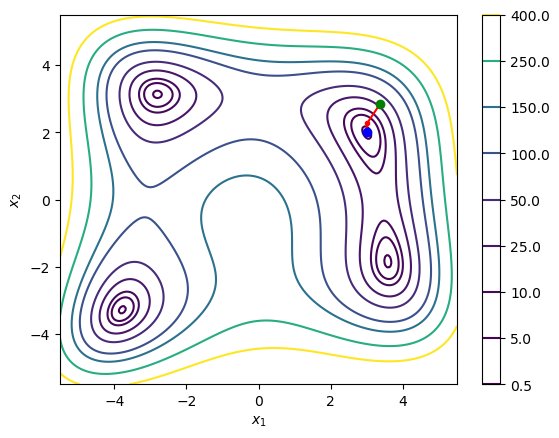


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.8858668e-13 1.0000000e+00], k = 10, f(xk) = 14.203125, |Grad f(xk)| = 8.015189710894884e-12
Convergió: True
Secuencia de puntos: [[1.6903488247934284, 2.564665823394187], [1.4107395309920987, 2.1899872916651333], [1.1486487720524963, 1.8660130823602503], [0.8884345067710528, 1.5839327026753431], [0.6117130015869789, 1.33822562264464], [0.3141538088370518, 1.137151963464418], [0.0733855338863725, 1.022036105362157], [0.002520808488420817, 1.000417858444014], [1.541758091310949e-06, 1.0000001282528905], [2.885866795691508e-13, 1.000000000000012]]


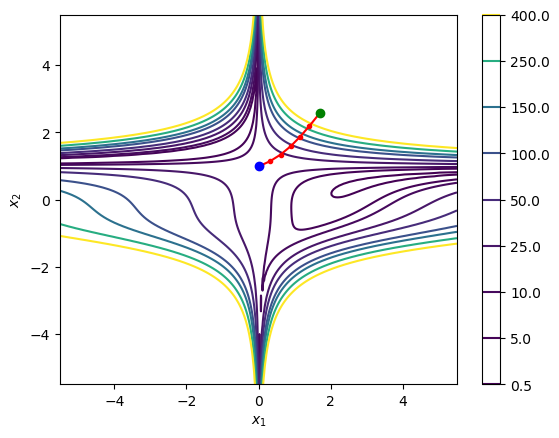


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ]:
xk = [1. 1.], k = 6, f(xk) = 3.4326461875363225e-20, |Grad f(xk)| = 8.285705791275366e-09
Convergió: True
Secuencia de puntos: [[-1.1752808988764043, 1.3806741573033703], [0.7631148711764493, -3.175033854748146], [0.7634296788840536, 0.5828247754971163], [0.9999953110849961, 0.9440273238533463], [0.9999956956536735, 0.9999913913257267], [0.9999999999999999, 0.9999999999814724]]


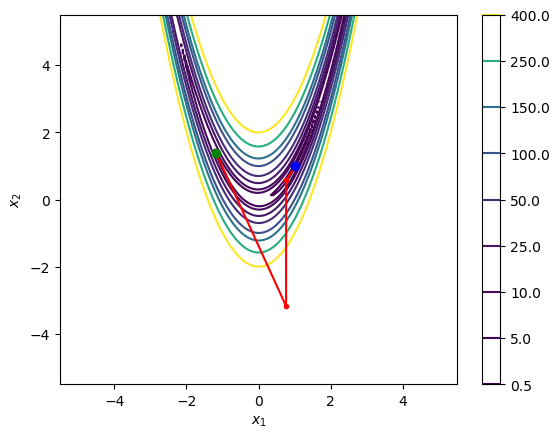


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [ 3.66979523e-02 -2.65600778e-01  4.26068519e-01  9.83790507e-02
  1.17204817e+00 -5.68748384e+00  8.24881119e+00  1.60823148e-08
 -1.59239433e+09  2.53571970e+18], k = 1000, f(xk) = 2.561076896533623e+20, |Grad f(xk)| = 3.6473379136408756e+23
Convergió: False

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [-1.44793750e+01  6.75706500e+00  2.58321950e+00 -2.19487673e+00
  3.56125697e+00  2.49692205e+00 -9.86721385e-01 -2.97555710e+00
  3.11928234e+00  2.13901000e+00  1.37969138e+00  8.52020482e-01
  1.62847181e-01 -1.66001642e+00  1.30622244e+00  1.10745441e+00
  9.35297172e-01 -2.81627689e-10  1.11702360e+09  1.24774093e+18], k = 1000, f(xk) = 6.108228981939937e+25, |Grad f(xk)| = 225817345064.47028
Convergió: False

Función de Hartmann dimensión 6:
Resultado para x0 = [0. 0. 0. 0. 0. 0.]:
xk = [-0.19792374 -0.14385256 -0.2060

In [128]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(10)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)])
]

# Puntos iniciales para la función de Hartmann
puntos_iniciales_hartmann = [np.zeros(6)]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)

# Número máximo de iteraciones
NMax = 1000

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, gradiente, secuencia = NewtonPuro(func, grad_func, hess_func, x0, tau, NMax)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock)

# Probar con la función de Hartmann
print("Función de Hartmann dimensión 6:")
probar_newton(hartmann_6D, grad_hartmann_6D, hessian_hartmann_6D, puntos_iniciales_hartmann)

## Ejercicio 3

Modifique la función que implementa el método de Newton del Ejercicio 2 
para incluir el cálculo del tamaño de paso (Newton amortiguado).

1. Además de los parámetros que se mencionan en el Algoritmo 1, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo
   como lo hace el método de Newton, pero 
   si ese paso no satisface la condición de descenso, dejamos que lo recorte.
   
   No tenemos garantizado que la matriz Hessiana $\mathbf{H}_k$ sea
   definida positiva, así que agregamos los siguientes pasos al algoritmo
   después de calcular la dirección $\mathbf{p}_k$:
- Si $\mathbf{g}_k^\top\mathbf{p}_k>0$, hacer $\mathbf{p}_k = -\mathbf{p}_k$
  para que sea dirección de descenso.
- Calcular $\alpha_k$ usando el algoritmo de backtracking.
- Calcular $\mathbf{x}_{k+1} = \mathbf{x}_{k} + \alpha_k \mathbf{p}_{k}$.



In [129]:
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

In [130]:
def is_positive_definite_cholesky(M):
    try:
        L = np.linalg.cholesky(M)
        return True, L
    except np.linalg.LinAlgError:
        return False, None
    
def modify_hessian(H, beta=1e-4):
    # Asegura que la matriz H sea suficientemente definida positiva
    # Agrega un término a la diagonal hasta que sea definida positiva
    n = H.shape[0]
    while not is_positive_definite_cholesky(H)[0]:
        H += beta * np.eye(n)  # Añade beta*I a H
        beta *= 2  # Aumenta beta para la siguiente iteración si es necesario
    return H

In [131]:
def NewtonAmortiguado(f, gradf, hesf, x0, tau, nMax, alpha_0, rho, c1, nBack):

    xk = np.array(x0)
    sequence = []
    alpha_sequence = []
    iteraBack_sequence = []

    for k in range(nMax):
        
        # Calcular el gradiente
        gk = gradf(xk)
        
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence, alpha_sequence, iteraBack_sequence
        
        # Calcular la Hessiana en el punto xk
        H = hesf(xk)

        # Intenta calcular la factorización Cholesky para verificar si la matriz es definida positiva
        condition, L = is_positive_definite_cholesky(H)
        if not condition:
            H = modify_hessian(H)  # Modifica H si no es definida positiva
            L = np.linalg.cholesky(H)  # Calcula la factorización Cholesky de la H modificada

        # Resuelve el sistema lineal para encontrar la dirección pk
        y = np.linalg.solve(L, -gk)
        pk = np.linalg.solve(L.T, y)

        # Calcular el tamaño de paso usando backtracking
        alpha_k, iteraBack = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, -gk, nBack)

        # Actualizar xk
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.tolist())
            alpha_sequence.append(alpha_k)
            iteraBack_sequence.append(iteraBack)

    return xk, nMax, False, gk, sequence, alpha_sequence, iteraBack_sequence

2. Pruebe el algoritmo usando los puntos iniciales del Ejercicio 2, 
   fijando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina.
   Para el algoritmo de backtracking use $\rho=0.5, c_1=0.1$ y $N_b=500$.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 756, f(xk) = 7.562319534006497e-18, |Grad f(xk)| = 2.07568859135154e-08
Convergió: True
El valor promedio de los tamaños de paso:  0.02976190476190476
El valor promedio de las iteraciones del backtracking:  5.095238095238095
Secuencia de puntos: [[2.02127536900369, 3.9817996617466176], [2.041417405125162, 3.9638200426129777], [2.060565788426297, 3.946045148938763], [2.07883299266711, 3.928462087386885], [2.0963112390804843, 3.911060264807276], [2.113077309131384, 3.8938308359018263], [2.1291959729756185, 3.8767663107770347], [2.144722492590294, 3.859860269153444], [2.159704488513145, 3.8431071477782996], [2.1741833579877063, 3.8265020793347326]]


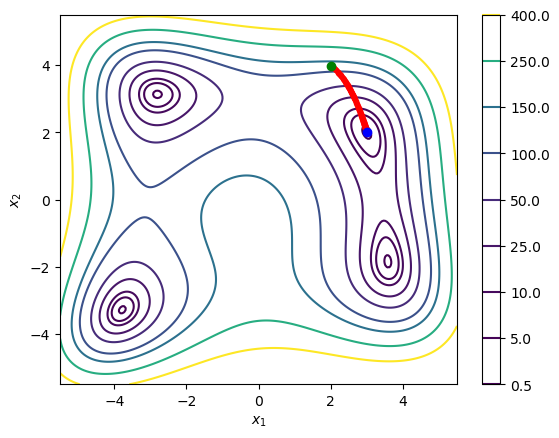


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.18732036 2.66997569], k = 1000, f(xk) = 2041.5630849371023, |Grad f(xk)| = 4658.092208441441
Convergió: False
El valor promedio de los tamaños de paso:  0.00048828125
El valor promedio de las iteraciones del backtracking:  11.0
Secuencia de puntos: [[1.9999388463990608, 2.9997989431996097], [1.9998776884166496, 2.9995979172259157], [1.9998165260694576, 2.9993969220684398], [1.999755359374148, 2.999195957716719], [1.9996941883473551, 2.998995024160305], [1.9996330130056852, 2.998794121388766], [1.999571833365716, 2.9985932493916834], [1.999510649443997, 2.9983924081586557], [1.9994494612570495, 2.9981915976792957], [1.9993882688213667, 2.997990817943231]]


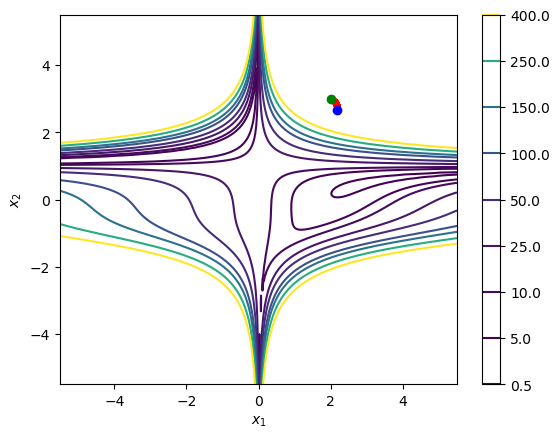


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ]:
xk = [-1.15983731  1.17959486], k = 1000, f(xk) = 7.408151965990579, |Grad f(xk)| = 87.74567755922222
Convergió: False
El valor promedio de los tamaños de paso:  0.0009765625
El valor promedio de las iteraciones del backtracking:  10.0
Secuencia de puntos: [[-1.199975860252809, 1.0003717521067417], [-1.1999516974391573, 1.0007430304044156], [-1.1999275115375172, 1.0011138352544833], [-1.1999033025263421, 1.0014841670179677], [-1.1998790703840663, 1.0018540260554534], [-1.1998548150891046, 1.0022234127270866], [-1.1998305366198534, 1.0025923273925768], [-1.1998062349546892, 1.0029607704111956], [-1.1997819100719698, 1.0033287421417783], [-1.1997575619500336, 1.0036962429427232]]


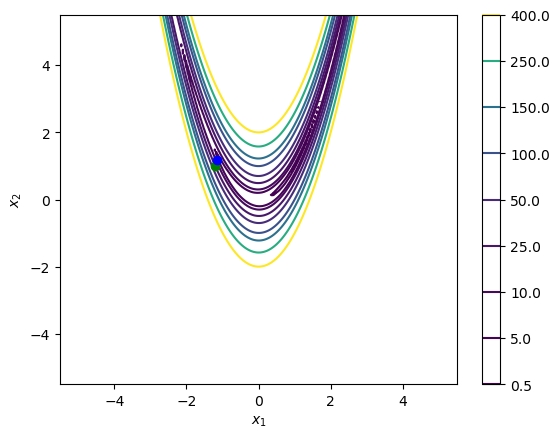


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [-1.10363571  1.20890709  1.25578289  0.55989122 -0.01120071  0.14820116
 -0.70690234  0.77370117  0.47582915  0.0290157 ], k = 1000, f(xk) = 196.17327587522854, |Grad f(xk)| = 522.9847817670126
Convergió: False

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [-1.13349454  1.28816386  1.43813202  0.39365031 -0.26000865  0.24822679
 -0.34751899  0.27576032 -0.32710131  0.25908647 -0.3653795   0.30279249
 -0.26381373  0.19351726 -0.57125192  0.57344523  0.18928002  0.14207198
 -0.29640858 -0.02413362], k = 1000, f(xk) = 459.0827971926098, |Grad f(xk)| = 1001.5420008918489
Convergió: False

Función de Hartmann dimensión 6:
Resultado para x0 = [0. 0. 0. 0. 0. 0.]:
xk = [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053], k = 285, f(xk) = -3.042457737843049, |Grad f(xk)| = 1.6300338458145876e-08
Convergió: True



In [132]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(10)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)])
]

# Puntos iniciales para la función de Hartmann
puntos_iniciales_hartmann = [np.zeros(6)]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.1

# Número máximo de iteraciones
NMax = 1000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, gradiente, secuencia, a_seq, iBack_seq = NewtonAmortiguado(func, grad_func, hess_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"El valor promedio de los tamaños de paso: ", np.mean(a_seq))
            print(f"El valor promedio de las iteraciones del backtracking: ", np.mean(iBack_seq))
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock)

# Probar con la función de Hartmann
print("Función de Hartmann dimensión 6:")
probar_newton(hartmann_6D, grad_hartmann_6D, hessian_hartmann_6D, puntos_iniciales_hartmann)

## Ejercicio 4

Programe el método de Newton con modificación de los eigenvalores 
de la Hessiana de acuerdo al Algoritmo 4 de la Clase 11.

1. Además de los parámetros que se mencionan en el Algoritmo 4, la
   función que implementa el método debe recibir los parámetros
   del algoritmo de backtracking: $\rho>0$, $c_1>0$ y el número de
   iteraciones máximas $N_b$. Fijamos el valor inicial $\alpha_{ini}=1$ 
   para el algoritmo de backtracking para intentar dar el paso completo.
   
- Puede usar la función [eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)
  de la librería Numpy para calcular la descomposión espectral de 
  la Hessiana $\mathbf{H}_k$ y a partir de ésta calcular la Hessiana modificada.


In [133]:
def modificar_hessiana(H, delta):
    # Calcular los valores propios y vectores propios de H
    valores_propios, vectores_propios = np.linalg.eigh(H)
    
    # Modificar los valores propios si son menores que delta
    valores_propios_modificados = np.maximum(valores_propios, delta)
    
    # Reconstruir la Hessiana modificada
    H_modificada = vectores_propios @ np.diag(valores_propios_modificados) @ vectores_propios.T
    
    return H_modificada

In [134]:
def NewtonModEigen(f, gradf, hesf, x0, tau, nMax, alpha_0, rho, c1, nBack, delta):

    xk = np.array(x0)
    sequence = []
    alpha_sequence = []
    iteraBack_sequence = []

    for k in range(nMax):
        
        # Calcular el gradiente
        gk = gradf(xk)
        
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence, alpha_sequence, iteraBack_sequence
        
        # Calcular la Hessiana en el punto xk
        H = hesf(xk)

        # Calcula la Hessiana modificada
        Hmod = modificar_hessiana(H, delta)

        # Calcula la factorización Cholesky de la H modificada
        L = np.linalg.cholesky(Hmod)

        # Resuelve el sistema lineal para encontrar la dirección pk
        y = np.linalg.solve(L, -gk)
        pk = np.linalg.solve(L.T, y)

        # Calcular el tamaño de paso usando backtracking
        alpha_k, iteraBack = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, -gk, nBack)

        # Actualizar xk
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.tolist())
            alpha_sequence.append(alpha_k)
            iteraBack_sequence.append(iteraBack)

    return xk, nMax, False, gk, sequence, alpha_sequence, iteraBack_sequence


2. Pruebe el algoritmo usando la cantidad de iteraciones máximas $N=1000$, la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   $\delta = 0.005$, para backtracking  use $\rho=0.5, c_1=0.1$ y $N_b=500$
   y los puntos iniciales del Ejercicio 2.
   
   Imprima los mismos datos que se piden en el Ejercicio 2 para 
   que pueda comparar los resultados.

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 756, f(xk) = 7.562319534006497e-18, |Grad f(xk)| = 2.07568859135154e-08
Convergió: True
El valor promedio de los tamaños de paso:  0.02976190476190476
El valor promedio de las iteraciones del backtracking:  5.095238095238095
Secuencia de puntos: [[2.02127536900369, 3.9817996617466176], [2.041417405125162, 3.9638200426129777], [2.060565788426297, 3.946045148938763], [2.07883299266711, 3.928462087386885], [2.0963112390804843, 3.911060264807276], [2.113077309131384, 3.8938308359018263], [2.1291959729756185, 3.8767663107770347], [2.144722492590294, 3.859860269153444], [2.159704488513145, 3.8431071477782996], [2.1741833579877063, 3.8265020793347326]]


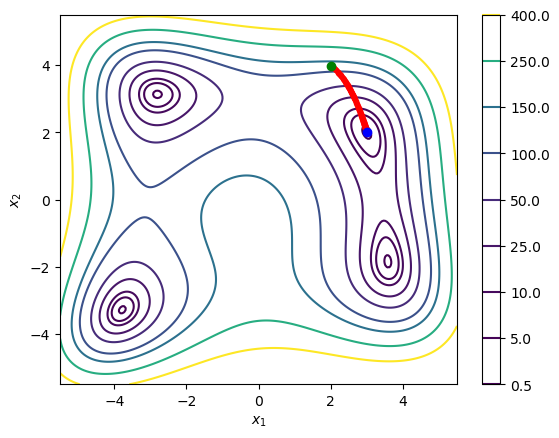


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [39.4734768  -1.55168793], k = 1000, f(xk) = 47163.50624101041, |Grad f(xk)| = 127134.4063151755
Convergió: False
El valor promedio de los tamaños de paso:  1.57318115234375e-05
El valor promedio de las iteraciones del backtracking:  15.995
Secuencia de puntos: [[13.10674559875506, -2.7616478939641054], [20.094628719520465, -2.142091869775935], [22.278552595761305, -2.039664014235321], [23.99516764052135, -1.9697480841836088], [25.42005415781871, -1.9172685183319544], [26.638631164268954, -1.8757438106496127], [27.700908221118276, -1.841749075559241], [28.63942645537735, -1.8132444363007625], [29.47688394887806, -1.788914034369885], [30.22991681453331, -1.7678588217891598]]


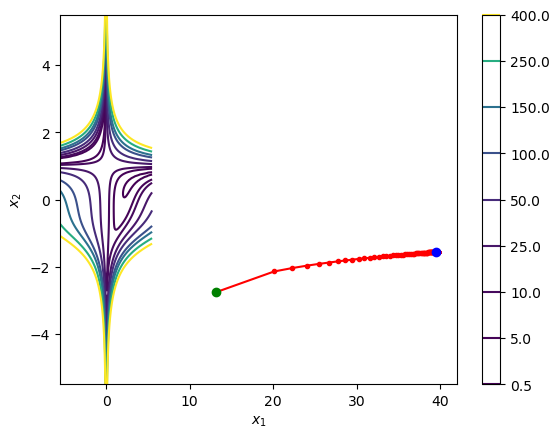


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ]:
xk = [-1.15983731  1.17959486], k = 1000, f(xk) = 7.408151965990579, |Grad f(xk)| = 87.74567755922222
Convergió: False
El valor promedio de los tamaños de paso:  0.0009765625
El valor promedio de las iteraciones del backtracking:  10.0
Secuencia de puntos: [[-1.199975860252809, 1.0003717521067417], [-1.1999516974391573, 1.0007430304044156], [-1.1999275115375172, 1.0011138352544833], [-1.1999033025263421, 1.0014841670179677], [-1.1998790703840663, 1.0018540260554534], [-1.1998548150891046, 1.0022234127270866], [-1.1998305366198534, 1.0025923273925768], [-1.1998062349546892, 1.0029607704111956], [-1.1997819100719698, 1.0033287421417783], [-1.1997575619500336, 1.0036962429427232]]


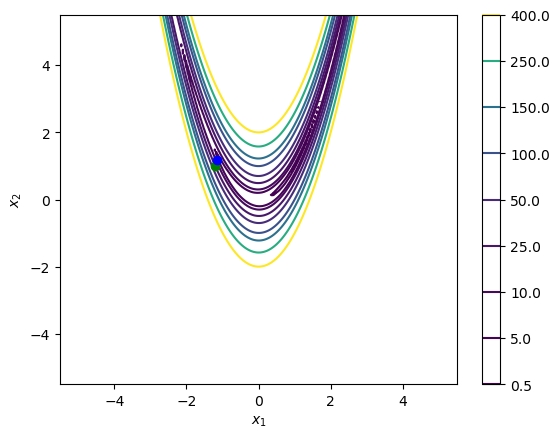


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [-3.43376908  6.09587399 12.56720166 -6.77144535 -7.63649538  3.3698115
  1.96505933  1.31335252  1.23619328  0.34400463], k = 1000, f(xk) = 3374497.708378831, |Grad f(xk)| = 862836.6732653778
Convergió: False

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [-11.04744401  23.37591757  56.7195633  -23.36082563 -14.47338995
   8.46998344   6.57672668  -3.0820652   -3.49982057   2.13914783
   0.61350516  -0.09902101  -1.40839153   1.25508392   0.50221796
   0.31876271  -1.19654536   1.36068384   1.09801033   0.52511265], k = 1000, f(xk) = 1111116379.9167895, |Grad f(xk)| = 73810349.61999738
Convergió: False

Función de Hartmann dimensión 6:
Resultado para x0 = [0. 0. 0. 0. 0. 0.]:
xk = [0.79235381 0.56908863 0.76260233 3.02842472 5.17778606 5.69848836], k = 1, f(xk) = -1.329896907216495, |Grad f(xk)| = 5.253855510113877e-120
Conver

In [135]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(10)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)])
]

# Puntos iniciales para la función de Hartmann
puntos_iniciales_hartmann = [np.zeros(6)]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)

# Parámetros iniciales
alpha_0 = 1.0
rho = 0.5
c1 = 0.1
delta = 0.005

# Número máximo de iteraciones
NMax = 1000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, gradiente, secuencia, a_seq, iBack_seq = NewtonModEigen(func, grad_func, hess_func, x0, tau, NMax, alpha_0, rho, c1, NBack, delta)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"El valor promedio de los tamaños de paso: ", np.mean(a_seq))
            print(f"El valor promedio de las iteraciones del backtracking: ", np.mean(iBack_seq))
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock)

# Probar con la función de Hartmann
print("Función de Hartmann dimensión 6:")
probar_newton(hartmann_6D, grad_hartmann_6D, hessian_hartmann_6D, puntos_iniciales_hartmann)

3. ¿Hay alguna ventaja de este algoritmo comparado con los implementados en los ejercicios 1 y 2, o basta con usar alguno de los anteriores?

---

No vi una ventaja significativa de este último método en comparación con los anteriores. Esto debido a que el número de iteraciones no disminuyó significativamente en comparación con los métodos probados en los incisos 2 y 3. De hecho, a mi parecer el mejor método fue el primero, el de Newton Puro ya que convergieron mas funciones en comparación del Newton Amortiguado y el Newton con modificación de eigenvalores. Esto puede ser explicado debido a que el método de Newton Puro, bajo ciertas condiciones, como una buena aproximación inicial y una función objetivo bien comportada cerca de su mínimo, puede proporcionar una convergencia rápida hacia el mínimo sin la necesidad de modificaciones adicionales. El método aprovecha la información de la segunda derivada para hacer ajustes más precisos en la dirección de descenso, lo que puede resultar en una convergencia más rápida en comparación con métodos que solo utilizan la primera derivada o que aplican modificaciones para asegurar la definición positiva de la Hessiana.

Por otro lado, el método de Newton Amortiguado y el método de Newton con modificación de eigenvalores de la matriz Hessiana están diseñados para mejorar la robustez del algoritmo de Newton en situaciones donde la matriz Hessiana no es definida positiva, lo que podría ocurrir en puntos de silla o en regiones donde la curvatura de la función objetivo es negativa. Estas modificaciones tienen como objetivo asegurar que el método siga una dirección de descenso y evite divergencias, a costa de posiblemente requerir más iteraciones o introducir pasos adicionales de cálculo, como el ajuste de los valores propios de la matriz Hessiana.
